# **Módulo 3 - Manipulação de Dados com Python**

O objetivo deste módulo é dar início ao processo de transformação e processamento de dados, para deixar no formato que precisamos antes de realizar a análise. Além disso, mostraremos como filtrar, modificar e juntar diferentes tipos de dados.

# 1. Bibliotecas


Dando continuidade ao que aprendemos no módulo anterior, neste módulo continuaremos explorando todo o potencial da biblioteca pandas.

Esta é a biblioteca de referência que devemos usar quando há necessidade de processamento e tratamento de dados.

Além disso, vamos mostrar alguns procedimentos que podemos realizar com dados, utilizando para isso dados financeiros como exemplo.

In [ ]:
# Execute apenas se for preciso instalar as bibliotecas

!pip install pandas numpy
!pip install datetime
!pip install matplotlib plotly
!pip install yfinance quandl

     |████████████████████████████████| 51 kB 387 kB/s 
     |████████████████████████████████| 251 kB 7.8 MB/s 
     |████████████████████████████████| 63 kB 863 kB/s 
     |████████████████████████████████| 6.4 MB 9.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
# Manipulação de dados
import pandas as pd
import numpy as np

# Visualização de dados
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# Importação de dados financeiros
import yfinance as yf
import quandl

# 2. Criar e organizar um dataframe

## 2.1. Dataframe simples, uma coluna

Vamos utilizar a API da Quandl (Nasdaq) que já vimos anteriormente para fazer a extração dos dados da Selic.

In [ ]:
# Aqui você deve inserir sua senha de acesso da API

quandl.ApiConfig.api_key = "4NFLzs3fgqxK3JHsN-dX"

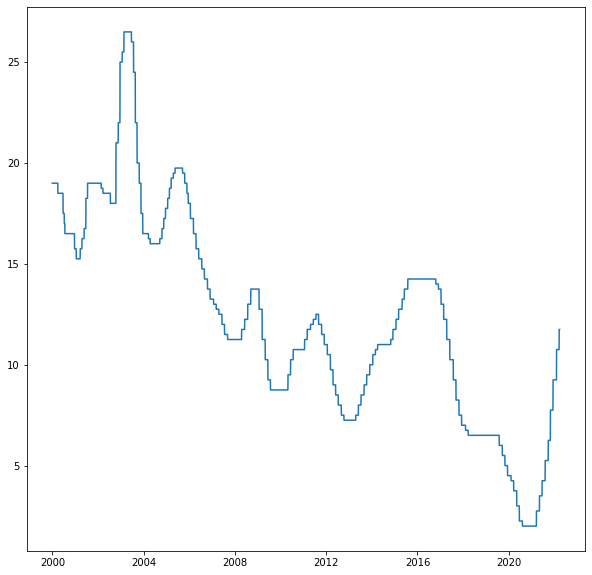

In [ ]:
# Os códigos referentes a cada papel / moeda / taxa de juros podem ser obtidos na busca do proprio site da Quandl
# Nesse caso, a selic é representada por BCB/432

selic = quandl.get("BCB/432", start_date="2000-01-01",end_date="2022-12-31")

plt.figure(figsize=(10,10))
plt.plot(selic)
plt.show()

In [ ]:
# Vamos inspecionar o formato dos dados

selic.head()

,Value
Date,
2000-01-01,19.0
2000-01-02,19.0
2000-01-03,19.0
2000-01-04,19.0
2000-01-05,19.0


Observe a estrutura do data frame acima. Perceba que ele possui apenas uma coluna e um índice (data). Data frames assim são fáceis de trabalhar pois as tarefas realizadas nele são automaticamente aplicadas a sua única coluna, portanto não é necessário mencionar o nome desta única coluna.

Os dataframes lembram muito os nossos conhecidos arquivos de planilha como Excel ou Google Sheets

## 2.2. Filtros simples

Imagine que você trabalha num banco e agora lhe foi dada a tarefa de selecionar um valor de Selic para um dia específico. Como você poderia fazer?

É para resolver problemas assim que existem os métodos .loc e .iloc. Como eles funcionam?

A ideia desses métodos é de possibilitar um filtro nos nossos dados para obter uma linha ou célula específicas.

##### O método .loc

O .loc é utilizado quando o filtro deve ser feito com a métrica utilizada no índice do nosso dataframe.

Por exemplo, a métrica utilizada como índice no nosso dataframe é data. Portanto, nesse caso devemos usar o .loc com a data que queremos fazer o filtro.

Imagine que o seu gestor te perguntou qual era o valor da Selic no dia 26/05/21

Você poderia ter feito assim:

In [ ]:
selic_filtrada = selic.loc['2021-05-26']
selic_filtrada

Value    3.5
Name: 2021-05-26 00:00:00, dtype: float64

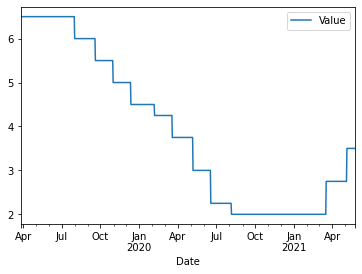

In [ ]:
# Para obter os dados entre duas datas específicas

selic_filtrada = selic.loc['2019-03-26':'2021-05-26']
selic_filtrada.plot()

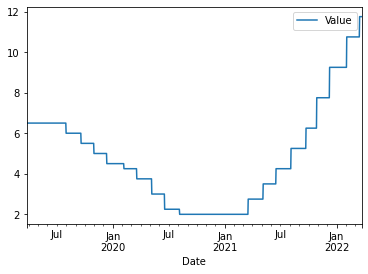

In [ ]:
# Filtrando a partir de uma data específica e indo até o último dia disponível

selic_filtrada = selic.loc['2019-03-26':]
selic_filtrada.plot()

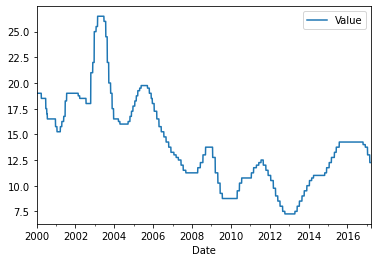

In [ ]:
# Obtendo os dados desde o início e indo até uma data limite específica, nesse caso 26/03/2017

selic_filtrada = selic.loc[:'2017-03-26']
selic_filtrada.plot()

##### O método .iloc

O .iloc é utilizado quando o filtro deve ser feito com a posição da linha dentro do nosso dataframe.

Por exemplo, caso você precise da linha 0 ou linha 1. Ou mesmo se precisar da linha 200 até a linha 500.

Exemplos:

In [ ]:
# Obtendo a linha 0 (primeira linha, excluindo o cabeçalho)

selic_filtrada = selic.iloc[0]
selic_filtrada

Value    19.0
Name: 2000-01-01 00:00:00, dtype: float64

In [ ]:
# Obtendo a linha 1 (lembrar sempre da indexação iniciando em 0 no Python)

selic_filtrada = selic.iloc[1]
selic_filtrada

Value    19.0
Name: 2000-01-02 00:00:00, dtype: float64

In [ ]:
# Obtendo a linha 200

selic_filtrada = selic.iloc[200]
selic_filtrada

Value    17.0
Name: 2000-07-19 00:00:00, dtype: float64

In [ ]:
# Obtendo a última linha

selic_filtrada = selic.iloc[-1]
selic_filtrada

Value    11.75
Name: 2022-03-24 00:00:00, dtype: float64

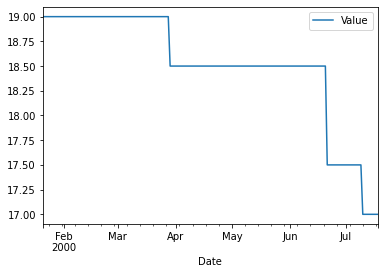

In [ ]:
# Obtendo da linha 20 até a linha 200 (lembrando também da indexação, 200 não inclusiva)

selic_filtrada = selic.iloc[20:200]
selic_filtrada.plot()

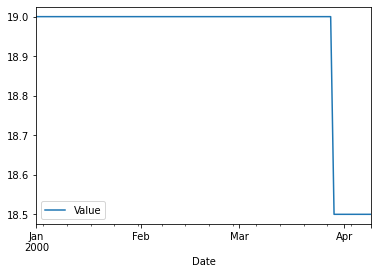

In [ ]:
# Obtendo todas as linhas até a linha 100 (linha 100 não entra)

selic_filtrada = selic.iloc[:100]
selic_filtrada.plot()

## 2.3. Noções importantes de dataframes

Para demonstrar manipulações de dados em um dataframe de várias colunas, vamos extrair os dados das ações que compõem o IBOV

Para saber a composição atualizada do IBOV, acesse o link:
https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-composicao-da-carteira.htm


Nesta seção, vamos utilizar algumas bibliotecas de dados de mercado financeiro, como a yfinance, que extrai dados do Yahoo Finance

Os ativos que compõem o IBOV são os seguintes:


['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

Vamos transformar isso agora numa lista

In [ ]:
tickers_IBOV = ['WEGE3', 'EMBR3', 'AZUL4', 'CCRO3', 'ECOR3', 'GOLL4', 'RAIL3', 'POSI3', 'BRFS3', 'JBSS3', 'MRFG3', 'BEEF3', 'ABEV3', 'ASAI3', 'CRFB3', 'PCAR3', 'NTCO3', 'AMER3', 'SOMA3', 'LREN3', 'MGLU3', 'PETZ3', 'VIIA3', 'ALPA4', 'CYRE3', 'EZTC3', 'JHSF3', 'MRVE3', 'CVCB3', 'COGN3', 'RENT3', 'LCAM3', 'YDUQ3', 'BRML3', 'IGTI11', 'MULT3', 'BIDI11', 'BPAN4', 'BBDC3', 'BBDC4', 'BBAS3', 'BPAC11', 'ITSA4', 'ITUB4', 'SANB11', 'BBSE3', 'IRBR3', 'SULA11', 'B3SA3', 'CIEL3', 'DXCO3', 'KLBN11', 'SUZB3', 'BRAP4', 'CMIN3', 'VALE3', 'BRKM5', 'GGBR4', 'GOAU4', 'CSNA3', 'USIM5', 'RRRP3', 'CSAN3', 'PETR3', 'PETR4', 'PRIO3', 'UGPA3', 'VBBR3', 'HYPE3', 'RADL3', 'FLRY3', 'HAPV3', 'GNDI3', 'QUAL3', 'RDOR3', 'LWSA3', 'CASH3', 'TOTS3', 'VIVT3', 'TIMS3', 'SBSP3', 'CMIG4', 'CPLE6', 'CPFE3', 'ELET3', 'ELET6', 'ENBR3', 'ENGI11', 'ENEV3', 'EGIE3', 'EQTL3', 'TAEE11']

In [ ]:
# Como ordenar esses papéis em ordem alfabética?

tickers_IBOV.sort()
tickers_IBOV

['ABEV3',
 'ALPA4',
 'AMER3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BBAS3',
 'BBDC3',
 'BBDC4',
 'BBSE3',
 'BEEF3',
 'BIDI11',
 'BPAC11',
 'BPAN4',
 'BRAP4',
 'BRFS3',
 'BRKM5',
 'BRML3',
 'CASH3',
 'CCRO3',
 'CIEL3',
 'CMIG4',
 'CMIN3',
 'COGN3',
 'CPFE3',
 'CPLE6',
 'CRFB3',
 'CSAN3',
 'CSNA3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'EGIE3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENEV3',
 'ENGI11',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GNDI3',
 'GOAU4',
 'GOLL4',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'JHSF3',
 'KLBN11',
 'LCAM3',
 'LREN3',
 'LWSA3',
 'MGLU3',
 'MRFG3',
 'MRVE3',
 'MULT3',
 'NTCO3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PETZ3',
 'POSI3',
 'PRIO3',
 'QUAL3',
 'RADL3',
 'RAIL3',
 'RDOR3',
 'RENT3',
 'RRRP3',
 'SANB11',
 'SBSP3',
 'SOMA3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VBBR3',
 'VIIA3',
 'VIVT3',
 'WEGE3',
 'YDUQ3']

**PONTO IMPORTANTE**

As ações brasileiras no Yahoo Finance terminam com ".SA". Isso é válido inclusive para outros papéis, como ETFs, FIIs, BDRs

Como acrescentar ".SA" ao fim do nome de um papel?

Veja o raciocínio abaixo:

In [ ]:
acao = 'PETR4'

acao + ".SA"

# Observe que "somamos" o ".SA" ao ticker de "PETR4"

'PETR4.SA'

Precisamos então criar uma estrutura que faça isso para todos os papéis de uma vez

In [ ]:
ativo_SA = 0
tickers_IBOV_SA = []

for i in tickers_IBOV:
  ativo_SA = (i+'.SA')
  tickers_IBOV_SA.append(ativo_SA)

tickers_IBOV_SA

['ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'ASAI3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BIDI11.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'CMIN3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IGTI11.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB1

Uma vez que temos uma lista com o nome dos tickers corrigidos para fazer a busca na yfinance (que extrai os dados da Yahoo Finance)

In [ ]:
# Extração para um ativo

yf.download("PETR4.SA", start='2022-02-01', end='2022-02-18', period = "1d")

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,32.349998,33.320000,31.950001,33.000000,33.000000,57315200
2022-02-02,33.410000,33.490002,32.360001,32.520000,32.520000,36271700
2022-02-03,32.349998,32.919998,31.620001,32.070000,32.070000,51087800
2022-02-04,32.410000,33.230000,31.879999,32.630001,32.630001,59346800
2022-02-07,32.549999,32.779999,32.130001,32.150002,32.150002,48868100
2022-02-08,31.900000,31.950001,31.260000,31.830000,31.830000,62590000
2022-02-09,31.740000,32.689999,31.650000,31.950001,31.950001,50960500
2022-02-10,32.299999,32.900002,31.940001,32.439999,32.439999,49534600
2022-02-11,32.770000,33.910000,32.630001,33.759998,33.759998,88013400


Observe a estrutura dos dados acima. Temos Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume. Podemos reproduzir a mesma estrutura caso queiramos obter dados de vários papéis ao mesmo tempo.

In [ ]:
# Na yfinance as vezes pode ocorrer erros na busca de alguns ativos (usualmente se for uma unit). Note que nesse caso houve um erro em BIDI11
# Pode ver que é um problema pontual https://finance.yahoo.com/quote/BIDI11.SA/history?p=BIDI11.SA

yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = "1d")

[*********************100%***********************]  92 of 92 completed

1 Failed download:
- BIDI11.SA: No data found for this date range, symbol may be delisted


Adj Close                                                     \
            ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA B3SA3.SA   
Date                                                                      
2022-02-10     14.75  26.600000  33.950001    12.68  28.620001    14.10   
2022-02-11     14.86  27.090000  32.540001    12.34  26.950001    13.92   
2022-02-14     15.06  27.299999  33.720001    12.33  26.990000    14.12   
2022-02-15     15.38  28.020000  35.860001    12.18  29.270000    14.60   
2022-02-16     15.08  27.090000  35.439999    13.05  29.290001    14.59   
2022-02-17     14.85  26.799999  34.279999    13.25  28.780001    14.20   

                                                        ...   Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ... TIMS3.SA   
Date                                                    ...            
2022-02-10  31.647896  17.332458  21.050354  23.429953  ...  8989100   
2022-02-11  32.756111  17.512276  21.120289  22.760000  ...  7409300   
2022-02-14  32.893414  17.642145  21.150261  23.370001  ...  6602900   
2022-02-15  34.452763  17.841944  21.170242  23.139999  ...  4562700   
2022-02-16  34.648907  17.991791  21.420010  23.080000  ...  4051700   
2022-02-17  34.648907  17.811972  21.170242  23.170000  ...  3886000   

                                                                       \
            TOTS3.SA UGPA3.SA  USIM5.SA  VALE3.SA  VBBR3.SA  VIIA3.SA   
Date                                                                    
2022-02-10   4983300  5188100  25220700  47888900   7723700  88372900   
2022-02-11   5154800  7125100  66203500  34555300   8110900  73340800   
2022-02-14   4514100  4354600  23686600  22804400   7618600  56300300   
2022-02-15   6855400  5731500  28728900  29624900  10902900  36145600   
2022-02-16   6116000  8601000  20383200  20774700  19215900  45592600   
2022-02-17  14125600  5515000  29080100  36259300  12474100  60121500   

                                        
           VIVT3.SA  WEGE3.SA YDUQ3.SA  
Date                                    
2022-02-10  2213800   8569200  1533100  
2022-02-11  1727000   9352700  1702400  
2022-02-14  1885500  10962400  1517100  
2022-02-15  2378200  11758400  3240500  
2022-02-16  2220300  20714400  2096000  
2022-02-17  1424100   8085500   945500  

[6 rows x 552 columns]

Perceba que a estrutura acima replica as 5 colunas (Abertura, Máxima, Mínima, Fechamento, Fechamento Ajustado e Volume) para todos os papéis. Isso cria uma estrutura muito grande e difícil de trabalhar. É melhor selecionar apenas uma coluna específica para esses papéis:

In [ ]:
# Nesse caso, estamos não apenas extraindo os dados, mas armazenando na variável cotacoes_IBOV

cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = "1d")

[*********************100%***********************]  92 of 92 completed

1 Failed download:
- BIDI11.SA: No data found for this date range, symbol may be delisted



Para facilitar nossa vida, podemos obter apenas os dados da coluna **Adj Close** para todos os papéis de uma vez

In [ ]:
yf.download(tickers_IBOV_SA, start='2022-02-10', end='2022-02-18', period = "1d")['Adj Close']

[*********************100%***********************]  92 of 92 completed

1 Failed download:
- BIDI11.SA: No data found for this date range, symbol may be delisted


,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2022-02-10,14.75,26.600000,33.950001,12.68,28.620001,14.10,31.647896,17.332458,21.050354,23.429953,...,13.96,27.700001,14.335758,16.780001,90.410995,22.840000,4.34,49.473869,29.535278,21.690001
2022-02-11,14.86,27.090000,32.540001,12.34,26.950001,13.92,32.756111,17.512276,21.120289,22.760000,...,13.90,27.629999,14.355517,15.530000,88.581009,22.850000,4.12,49.733311,29.326725,21.219999
2022-02-14,15.06,27.299999,33.720001,12.33,26.990000,14.12,32.893414,17.642145,21.150261,23.370001,...,13.88,28.670000,14.444437,15.680000,88.195747,23.070000,4.02,49.723335,30.230461,21.790001
2022-02-15,15.38,28.020000,35.860001,12.18,29.270000,14.60,34.452763,17.841944,21.170242,23.139999,...,13.84,30.219999,14.948313,15.590000,85.575974,23.620001,4.12,48.895107,32.653667,22.930000
2022-02-16,15.08,27.090000,35.439999,13.05,29.290001,14.59,34.648907,17.991791,21.420010,23.080000,...,13.82,30.450001,15.610267,15.490000,86.202026,24.450001,4.15,49.184490,31.084539,22.350000
2022-02-17,14.85,26.799999,34.279999,13.25,28.780001,14.20,34.648907,17.811972,21.170242,23.170000,...,13.78,32.220001,15.323750,14.860000,82.493896,24.139999,4.01,49.643501,30.439014,22.010000


Perceba que reduzimos o número de colunas de 552 para 92 (Adj Close dos 92 ativos da lista)

Vamos criar um novo dataframe com o resultado da busca de cotação ao longo de todo o período de 2021, considerando todos as colunas disponíveis (OHLC, Adj Close e Volume)

In [ ]:
cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2021-01-01', end='2021-12-31', period = "1d")

[*********************100%***********************]  92 of 92 completed


In [ ]:
# Reforçando a complexidade do dateframe, composto por pois índices de colunas
# Indice 0 para os parâmetros das cotações e índice 1 para os ativos

cotacoes_IBOV.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'ASAI3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=552)

In [ ]:
# Usando o set (conjunto) podemos remover as duplicatas e ver a lista de parâmetros disponíveis

set(cotacoes_IBOV.columns.get_level_values(0))

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [ ]:
# Filtrar apenas o índice que contém os preços de Adj Close

cotacoes_IBOV_Adj_Close = cotacoes_IBOV['Adj Close']
cotacoes_IBOV_Adj_Close

,ABEV3.SA,ALPA4.SA,AMER3.SA,ASAI3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,...,TIMS3.SA,TOTS3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VBBR3.SA,VIIA3.SA,VIVT3.SA,WEGE3.SA,YDUQ3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2021-01-04,14.827890,41.191307,73.699677,NaN,37.730000,18.778421,34.218559,20.397018,22.916544,27.130732,...,13.942406,27.485809,23.273859,13.795487,74.881577,19.998852,16.170000,42.478115,36.632359,33.465923
2021-01-05,15.143991,41.211086,72.052757,NaN,38.200001,18.815374,33.863541,20.299498,22.776823,26.623009,...,13.623556,27.357092,23.080873,13.943232,76.142426,20.227673,16.219999,42.117500,38.880760,33.633251
2021-01-06,15.450509,38.966091,67.347267,NaN,36.669998,18.507429,34.637302,20.809793,23.531713,26.189142,...,13.246734,26.060034,22.801048,14.617309,78.639572,19.934782,15.490000,41.645943,39.911697,32.294621
2021-01-07,15.373879,38.273800,65.984634,NaN,36.049999,19.024775,36.011871,21.320095,24.156448,26.743015,...,13.034168,25.990723,23.495789,15.319086,83.773041,20.300894,15.080000,40.591843,41.561180,32.698177
2021-01-08,15.833660,40.251770,70.582291,NaN,36.599998,19.305004,36.221245,21.155760,23.948204,27.573833,...,13.623556,27.723440,24.103689,15.245215,83.511040,20.868366,15.530000,41.655186,44.074677,33.810425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-23,15.550000,36.379086,30.124914,14.09,26.459999,11.091658,28.656693,16.201773,19.187614,19.832745,...,12.870000,28.608072,14.098640,14.860000,76.233414,21.040001,4.500000,48.383358,33.239605,20.330000
2021-12-27,15.530000,36.488602,31.271875,13.64,25.670000,11.023431,28.715538,16.371267,19.407013,19.957781,...,12.890000,28.677750,14.385158,15.040000,76.040779,21.309999,4.860000,48.092300,32.941666,20.070000
2021-12-28,15.520000,36.588161,30.419008,13.10,25.750000,10.877232,28.548817,16.361296,19.337204,19.996254,...,12.760000,28.190001,14.434557,14.750000,74.210793,21.469999,4.950000,47.877293,33.060844,20.860001


In [ ]:
# Filtrar apenas o índice que contém os preços de Adj Close e ABEV3.SA ao mesmo tempo (acaba sendo uma única coluna)
# Como é apenas uma coluna, ele desconsidera o formato dateframe e traz como um formato "series" da biblioteca pandas
# Usando pd.DataFrame podemos reconfigurar como dataframe

cotacoes_IBOV_Adj_Close_ABEV3 = cotacoes_IBOV[('Adj Close','ABEV3.SA')]
cotacoes_IBOV_Adj_Close_ABEV3 = pd.DataFrame(cotacoes_IBOV_Adj_Close_ABEV3)
cotacoes_IBOV_Adj_Close_ABEV3

,Adj Close
,ABEV3.SA
Date,
2021-01-04,14.827890
2021-01-05,15.143991
2021-01-06,15.450509
2021-01-07,15.373879
2021-01-08,15.833660
...,...
2021-12-23,15.550000
2021-12-27,15.530000


## 2.4. Manejo dos NAs e NaN

In [ ]:
# O método isna() retorna um booleano (True/False). Como vimos, no Python o True equivale a 1 e False equivale a 0.
# Se eu somar uma coluna/linha composta por True/False eu consigo saber qts True existem (e nesse caso do .isna, saber qts NAs existem)
# O método sum() = sum(0), já que 0 é o default do método e representa a soma de todos as células de uma coluna. Se colocarmos sum(1), teremos a soma de todas as celulas de uma linha

count_null = cotacoes_IBOV.isna().sum()
count_null

# O output a seguir me mostra que existe 1 NA na coluna de Adj Close de ABEV3 (podemos checar a data logo abaixo pra ver pq isso aconteceu com todos os ativos)
# Já ASAI3 possui 38 células com NA. Começou a ser negociada no IBOV em março apenas

Adj Close  ABEV3.SA     1
           ALPA4.SA     1
           AMER3.SA     1
           ASAI3.SA    38
           AZUL4.SA     1
                       ..
Volume     VBBR3.SA     1
           VIIA3.SA     1
           VIVT3.SA     1
           WEGE3.SA     1
           YDUQ3.SA     1
Length: 552, dtype: int64

In [ ]:
# Soma dos NAs por linhas. Primeira linha 18 NAs. Lembrando que uma linha é composta por 6 índices 0 (Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume), podemos concluir que existem 3 ativos (18/6) com NA na primeira linha

count_null_linha = cotacoes_IBOV.isna().sum(1)
count_null_linha

Date
2021-01-04    18
2021-01-05    18
2021-01-06    18
2021-01-07    18
2021-01-08    18
              ..
2021-12-23     0
2021-12-27     6
2021-12-28     6
2021-12-29     6
2021-12-30     6
Length: 248, dtype: int64

In [ ]:
# O método shape retorna o número de linhas e coluna de um dataframe

cotacoes_IBOV.shape

(248, 552)

In [ ]:
# Duas formas de obter o número de colunas

print(cotacoes_IBOV.shape[1])
len(cotacoes_IBOV.columns)

552


552

In [ ]:
# Usando as informações do shape e do isna, podemos fazer um filtro para retornar quais linhas (cotacoes_IBOV.shape[0]) ou colunas cotacoes_IBOV.shape[1] possuem uma fração específica de NAs
# No exemplo, exibir as linhas onde temos pelo menos 1 NA

cotacoes_IBOV[cotacoes_IBOV.isna().sum(1)>0]

Adj Close                                                       \
             ABEV3.SA   ALPA4.SA   AMER3.SA ASAI3.SA   AZUL4.SA   B3SA3.SA   
Date                                                                         
2021-01-04  14.827890  41.191307  73.699677      NaN  37.730000  18.778421   
2021-01-05  15.143991  41.211086  72.052757      NaN  38.200001  18.815374   
2021-01-06  15.450509  38.966091  67.347267      NaN  36.669998  18.507429   
2021-01-07  15.373879  38.273800  65.984634      NaN  36.049999  19.024775   
2021-01-08  15.833660  40.251770  70.582291      NaN  36.599998  19.305004   
...               ...        ...        ...      ...        ...        ...   
2021-11-19  16.736818  42.860416  32.908993    14.08  27.760000  12.001142   
2021-12-27  15.530000  36.488602  31.271875    13.64  25.670000  11.023431   
2021-12-28  15.520000  36.588161  30.419008    13.10  25.750000  10.877232   
2021-12-29  15.450000  36.189922  30.409204    12.84  23.860001  10.799258   
2021-12-30  15.420000  36.856972  30.958178    12.96  24.360001  10.857738   

                                                        ...      Volume  \
             BBAS3.SA   BBDC3.SA   BBDC4.SA   BBSE3.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  34.218559  20.397018  22.916544  27.130732  ...   3897800.0   
2021-01-05  33.863541  20.299498  22.776823  26.623009  ...   8506600.0   
2021-01-06  34.637302  20.809793  23.531713  26.189142  ...   9998400.0   
2021-01-07  36.011871  21.320095  24.156448  26.743015  ...  11072300.0   
2021-01-08  36.221245  21.155760  23.948204  27.573833  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-11-19  27.951269  17.290583  20.203831  21.381273  ...  14357600.0   
2021-12-27  28.715538  16.371267  19.407013  19.957781  ...   7282600.0   
2021-12-28  28.548817  16.361296  19.337204  19.996254  ...   3367300.0   
2021-12-29  28.401707  16.241655  19.247448  19.880835  ...   2589100.0   
2021-12-30  28.293827  16.141951  19.157694  19.957781  ...   7149400.0   

                                                                      \
             TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-11-19  2859600.0  8008200.0  25978000.0  26849500.0   7465500.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

                                                          
              VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-11-19  47654800.0  5553100.0   4636600.0  4290000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  2053000.0  

[224 rows x 552 columns]

In [ ]:
# Agora um filtro de NA mais complexo, onde os NAs representem mais de 50% dos dados de uma linha (NAs da linha/total de colunas > 0.5).
# Vemos que nenhuma linha possui tantos NAs

cotacoes_IBOV[(cotacoes_IBOV.isna().sum(1)/len(cotacoes_IBOV.columns))>0.5]

# Vemos que retornou os dados de uma data onde não houve pregão

Adj Close                                                        \
            ABEV3.SA ALPA4.SA AMER3.SA ASAI3.SA AZUL4.SA B3SA3.SA BBAS3.SA   
Date                                                                         
2021-04-02       NaN      NaN      NaN      NaN      NaN      NaN      NaN   

                                       ...   Volume                    \
           BBDC3.SA BBDC4.SA BBSE3.SA  ... TIMS3.SA TOTS3.SA UGPA3.SA   
Date                                   ...                              
2021-04-02      NaN      NaN      NaN  ...      NaN      NaN      NaN   

                                                                           
           USIM5.SA VALE3.SA VBBR3.SA VIIA3.SA VIVT3.SA WEGE3.SA YDUQ3.SA  
Date                                                                       
2021-04-02      NaN      NaN      NaN      NaN      NaN      NaN      NaN  

[1 rows x 552 columns]

In [ ]:
# Sabendo disso, posso usar o dropna para retirar qq linha que seja NA para o ativo ABEV3
# Usando o argumento inplace nem preciso criar uma nova variável (ex., cotacoes_IBOV2 que represente dados sem os NAs da sexta-feira de Pascoa)

cotacoes_IBOV.dropna(subset = [('Adj Close', 'ABEV3.SA')], inplace=True)

In [ ]:
# Maioria dos ativos contém todos os dados de cotações

count_null = cotacoes_IBOV.isna().sum()
count_null

Adj Close  ABEV3.SA     0
           ALPA4.SA     0
           AMER3.SA     0
           ASAI3.SA    37
           AZUL4.SA     0
                       ..
Volume     VBBR3.SA     0
           VIIA3.SA     0
           VIVT3.SA     0
           WEGE3.SA     0
           YDUQ3.SA     0
Length: 552, dtype: int64

In [ ]:
# Assim conseguimos saber quais ativos possuem pelo menos 1 NA

cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1]

MultiIndex([('Adj Close',  'ASAI3.SA'),
            ('Adj Close', 'BIDI11.SA'),
            ('Adj Close',  'CMIN3.SA'),
            ('Adj Close', 'IGTI11.SA'),
            (    'Close',  'ASAI3.SA'),
            (    'Close', 'BIDI11.SA'),
            (    'Close',  'CMIN3.SA'),
            (    'Close', 'IGTI11.SA'),
            (     'High',  'ASAI3.SA'),
            (     'High', 'BIDI11.SA'),
            (     'High',  'CMIN3.SA'),
            (     'High', 'IGTI11.SA'),
            (      'Low',  'ASAI3.SA'),
            (      'Low', 'BIDI11.SA'),
            (      'Low',  'CMIN3.SA'),
            (      'Low', 'IGTI11.SA'),
            (     'Open',  'ASAI3.SA'),
            (     'Open', 'BIDI11.SA'),
            (     'Open',  'CMIN3.SA'),
            (     'Open', 'IGTI11.SA'),
            (   'Volume',  'ASAI3.SA'),
            (   'Volume', 'BIDI11.SA'),
            (   'Volume',  'CMIN3.SA'),
            (   'Volume', 'IGTI11.SA')],
           )

In [ ]:
# Posso remover qualquer coluna (ativo) que apresente algum NA usando drop. Esse método exige um argumento (axis) informando se a remoção deve ocorrer nas linhas ou colunas. Axis = 1 colunas
# Note que ASAI3 por ex nao aparece mais no dataframe

cotacoes_IBOV_filter_NA = cotacoes_IBOV.drop(cotacoes_IBOV.columns[cotacoes_IBOV.isna().sum()>=1], axis=1)
cotacoes_IBOV_filter_NA.columns

MultiIndex([('Adj Close', 'ABEV3.SA'),
            ('Adj Close', 'ALPA4.SA'),
            ('Adj Close', 'AMER3.SA'),
            ('Adj Close', 'AZUL4.SA'),
            ('Adj Close', 'B3SA3.SA'),
            ('Adj Close', 'BBAS3.SA'),
            ('Adj Close', 'BBDC3.SA'),
            ('Adj Close', 'BBDC4.SA'),
            ('Adj Close', 'BBSE3.SA'),
            ('Adj Close', 'BEEF3.SA'),
            ...
            (   'Volume', 'TIMS3.SA'),
            (   'Volume', 'TOTS3.SA'),
            (   'Volume', 'UGPA3.SA'),
            (   'Volume', 'USIM5.SA'),
            (   'Volume', 'VALE3.SA'),
            (   'Volume', 'VBBR3.SA'),
            (   'Volume', 'VIIA3.SA'),
            (   'Volume', 'VIVT3.SA'),
            (   'Volume', 'WEGE3.SA'),
            (   'Volume', 'YDUQ3.SA')],
           length=528)

In [ ]:
# Nesse caso, vemos que não há nenhum NA na tabela

count_null = cotacoes_IBOV_filter_NA.isna().sum()
max(count_null)

0

In [ ]:
# ASAI3 por exemplo nao está mais neste dataframe

cotacoes_IBOV_filter_NA

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   AZUL4.SA   B3SA3.SA   BBAS3.SA   
Date                                                                           
2021-01-04  14.827890  41.191307  73.699677  37.730000  18.778421  34.218559   
2021-01-05  15.143991  41.211086  72.052757  38.200001  18.815374  33.863541   
2021-01-06  15.450509  38.966091  67.347267  36.669998  18.507429  34.637302   
2021-01-07  15.373879  38.273800  65.984634  36.049999  19.024775  36.011871   
2021-01-08  15.833660  40.251770  70.582291  36.599998  19.305004  36.221245   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  15.550000  36.379086  30.124914  26.459999  11.091658  28.656693   
2021-12-27  15.530000  36.488602  31.271875  25.670000  11.023431  28.715538   
2021-12-28  15.520000  36.588161  30.419008  25.750000  10.877232  28.548817   
2021-12-29  15.450000  36.189922  30.409204  23.860001  10.799258  28.401707   
2021-12-30  15.420000  36.856972  30.958178  24.360001  10.857738  28.293827   

                                                        ...      Volume  \
             BBDC3.SA   BBDC4.SA   BBSE3.SA   BEEF3.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  20.397018  22.916544  27.130732   9.044785  ...   3897800.0   
2021-01-05  20.299498  22.776823  26.623009   8.864609  ...   8506600.0   
2021-01-06  20.809793  23.531713  26.189142   8.738486  ...   9998400.0   
2021-01-07  21.320095  24.156448  26.743015   8.693442  ...  11072300.0   
2021-01-08  21.155760  23.948204  27.573833   8.765512  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  16.201773  19.187614  19.832745  10.530000  ...   2893300.0   
2021-12-27  16.371267  19.407013  19.957781  10.430000  ...   7282600.0   
2021-12-28  16.361296  19.337204  19.996254  10.550000  ...   3367300.0   
2021-12-29  16.241655  19.247448  19.880835  10.620000  ...   2589100.0   
2021-12-30  16.141951  19.157694  19.957781  10.600000  ...   7149400.0   

                                                                      \
             TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

                                                          
              VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  30613400.0  1382200.0   2166400.0  1731000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  2053000.0  

[247

## 2.5. Redução do número de colunas - "Wide to Long" 

In [ ]:
# Vamos aproveitar esse dataframe sem nenhum NA e trabalhar em cima dele.
# Neste caso, vamos apenas criar uma cópia dele, deixando-o com um nome um pouco mais simples

cotacoes_ativos = cotacoes_IBOV_filter_NA

In [ ]:
cotacoes_ativos

Adj Close                                                         \
             ABEV3.SA   ALPA4.SA   AMER3.SA   AZUL4.SA   B3SA3.SA   BBAS3.SA   
Date                                                                           
2021-01-04  14.827890  41.191307  73.699677  37.730000  18.778421  34.218559   
2021-01-05  15.143991  41.211086  72.052757  38.200001  18.815374  33.863541   
2021-01-06  15.450509  38.966091  67.347267  36.669998  18.507429  34.637302   
2021-01-07  15.373879  38.273800  65.984634  36.049999  19.024775  36.011871   
2021-01-08  15.833660  40.251770  70.582291  36.599998  19.305004  36.221245   
...               ...        ...        ...        ...        ...        ...   
2021-12-23  15.550000  36.379086  30.124914  26.459999  11.091658  28.656693   
2021-12-27  15.530000  36.488602  31.271875  25.670000  11.023431  28.715538   
2021-12-28  15.520000  36.588161  30.419008  25.750000  10.877232  28.548817   
2021-12-29  15.450000  36.189922  30.409204  23.860001  10.799258  28.401707   
2021-12-30  15.420000  36.856972  30.958178  24.360001  10.857738  28.293827   

                                                        ...      Volume  \
             BBDC3.SA   BBDC4.SA   BBSE3.SA   BEEF3.SA  ...    TIMS3.SA   
Date                                                    ...               
2021-01-04  20.397018  22.916544  27.130732   9.044785  ...   3897800.0   
2021-01-05  20.299498  22.776823  26.623009   8.864609  ...   8506600.0   
2021-01-06  20.809793  23.531713  26.189142   8.738486  ...   9998400.0   
2021-01-07  21.320095  24.156448  26.743015   8.693442  ...  11072300.0   
2021-01-08  21.155760  23.948204  27.573833   8.765512  ...   5816400.0   
...               ...        ...        ...        ...  ...         ...   
2021-12-23  16.201773  19.187614  19.832745  10.530000  ...   2893300.0   
2021-12-27  16.371267  19.407013  19.957781  10.430000  ...   7282600.0   
2021-12-28  16.361296  19.337204  19.996254  10.550000  ...   3367300.0   
2021-12-29  16.241655  19.247448  19.880835  10.620000  ...   2589100.0   
2021-12-30  16.141951  19.157694  19.957781  10.600000  ...   7149400.0   

                                                                      \
             TOTS3.SA   UGPA3.SA    USIM5.SA    VALE3.SA    VBBR3.SA   
Date                                                                   
2021-01-04  5429700.0  5472800.0  20687900.0  37865500.0   3953500.0   
2021-01-05  4430700.0  5428300.0  18302900.0  34300300.0  12993100.0   
2021-01-06  5512800.0  6564800.0  23592900.0  53722500.0  10884000.0   
2021-01-07  3322500.0  5638900.0  22298600.0  74541400.0   6954300.0   
2021-01-08  8427300.0  4449400.0  23237000.0  58562700.0   8434100.0   
...               ...        ...         ...         ...         ...   
2021-12-23  2731000.0  2238400.0  10681800.0  13121200.0   3932100.0   
2021-12-27  3040900.0  5340800.0  10504500.0  11371400.0   4196700.0   
2021-12-28  3269600.0  3777100.0  13201600.0  18923700.0   3743000.0   
2021-12-29  3205000.0  3591300.0  10525500.0  12113500.0   3630700.0   
2021-12-30  4400600.0  8871300.0  12815100.0  26568500.0  13547600.0   

                                                          
              VIIA3.SA   VIVT3.SA    WEGE3.SA   YDUQ3.SA  
Date                                                      
2021-01-04  44372400.0  2791400.0   7219800.0  2640400.0  
2021-01-05  41436700.0  2899200.0  16633600.0  3703500.0  
2021-01-06  49797300.0  5790100.0  21507400.0  5004000.0  
2021-01-07  70842700.0  5213500.0  15129600.0  6138600.0  
2021-01-08  58505800.0  2916600.0  17381000.0  2685800.0  
...                ...        ...         ...        ...  
2021-12-23  30613400.0  1382200.0   2166400.0  1731000.0  
2021-12-27  35550300.0  1492300.0   4457200.0  1809000.0  
2021-12-28  25433400.0  1060000.0   3670800.0  1710500.0  
2021-12-29  22334300.0   930200.0   3091700.0  1342300.0  
2021-12-30  58310400.0  2392600.0   4858300.0  2053000.0  

[247

#### Método melt

O melt é utilizado na biblioteca pandas para realizar uma transformação que chamamos de "wide to long".

Ou seja, se tivermos um dataframe grande e largo podemos transformá-lo num dataframe longo, com poucas colunas mas com muitas linhas.

O que antes eram as colunas agora viram categorias em colunas novas, as "variáveis", e os valores são todos mostrados na coluna valor, ou "value".



In [ ]:
# Veja que a quantidade de dados é a mesma, porém agora temos apenas 3 colunas e o índice (contendo as datas). Em contrapartida, passamos a ter mais de 130 mil linhas
# Essa estrutura é especialmente interessante para trabalharmos com filtros, análises estatísticas e modelagens em geral

cotacoes_ativos_long = pd.melt(cotacoes_ativos,ignore_index=False)
cotacoes_ativos_long

,variable_0,variable_1,value
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
# Exibindo o nome das colunas

cotacoes_ativos_long.columns

Index(['variable_0', 'variable_1', 'value'], dtype='object')

## 2.6. Renomeando colunas

In [ ]:
# Usamos um dicionário para renomear as colunas, contendo a estrutura {'nome antigo' : 'novo nome'}

cotacoes_ativos_long = cotacoes_ativos_long.rename({'variable_0':'Parametro', 
                                                    'variable_1':'Ativo', 'value':'Valor'}, axis=1)
cotacoes_ativos_long

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
# Categorias presentes na coluna "Parametro" (sem repetição)

set(cotacoes_ativos_long['Parametro'])

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

In [ ]:
# Categorias presentes na coluna "Ativo" (sem repetição)

set(cotacoes_ativos_long['Ativo'])

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SOMA3.SA',
 'SULA11.SA',
 'SUZB3

## 2.7. Filtros e substituições

In [ ]:
# Vamos criar uma cópia do dataframe original para fazermos algumas práticas de filtros e substituições

df_cotacoes = cotacoes_ativos_long.copy()
df_cotacoes

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
# Vamos filtrar o dataframe selecionando apenas as linhas onde a coluna "Parametro" possui a categoria "Adj Close"

df_cotacoes_Adj_Close = df_cotacoes[df_cotacoes.Parametro == 'Adj Close']
df_cotacoes_Adj_Close

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373879
2021-01-08,Adj Close,ABEV3.SA,15.833660
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,20.330000
2021-12-27,Adj Close,YDUQ3.SA,20.070000
2021-12-28,Adj Close,YDUQ3.SA,20.860001


In [ ]:
# mesmo filtro feito de outra forma

df_cotacoes_Adj_Close = df_cotacoes[df_cotacoes['Parametro'] == 'Adj Close']
df_cotacoes_Adj_Close

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,14.827890
2021-01-05,Adj Close,ABEV3.SA,15.143991
2021-01-06,Adj Close,ABEV3.SA,15.450509
2021-01-07,Adj Close,ABEV3.SA,15.373879
2021-01-08,Adj Close,ABEV3.SA,15.833660
...,...,...,...
2021-12-23,Adj Close,YDUQ3.SA,20.330000
2021-12-27,Adj Close,YDUQ3.SA,20.070000
2021-12-28,Adj Close,YDUQ3.SA,20.860001


In [ ]:
# Filtros com mais de uma condição

# Além de filtrar a coluna "Parametro", agora queremos estabelecer um filtro também na coluna "Valor"
# queremos selecionar as linhas que possuem valor menor de 10
# Por causa da presença do "&", as duas condições precisam ser respeitadas

df_cotacoes_Adj_Close_low_cost = df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & (df_cotacoes.Valor < 10)]
df_cotacoes_Adj_Close_low_cost

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,BEEF3.SA,9.044785
2021-01-05,Adj Close,BEEF3.SA,8.864609
2021-01-06,Adj Close,BEEF3.SA,8.738486
2021-01-07,Adj Close,BEEF3.SA,8.693442
2021-01-08,Adj Close,BEEF3.SA,8.765512
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


In [ ]:
# Selecionando apenas as linhas que possuem dados de Volume
df_cotacoes_Volume = df_cotacoes[df_cotacoes.Parametro == 'Volume']

In [ ]:
df_cotacoes_Volume

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1731000.0
2021-12-27,Volume,YDUQ3.SA,1809000.0
2021-12-28,Volume,YDUQ3.SA,1710500.0


In [ ]:
# Calculando a mediana do valor de Volume de todos os papéis
volume_mediano = np.median(df_cotacoes_Volume.Valor)
volume_mediano

6424200.0

In [ ]:
# Vamos selecionar apenas os pregões onde o volume negociado por ativo foi acima da mediana de volume calculada acima
df_cotacoes[(df_cotacoes.Valor > volume_mediano)]

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Volume,ABEV3.SA,17835200.0
2021-01-05,Volume,ABEV3.SA,37105800.0
2021-01-06,Volume,ABEV3.SA,28371600.0
2021-01-07,Volume,ABEV3.SA,32540100.0
2021-01-08,Volume,ABEV3.SA,30188800.0
...,...,...,...
2021-02-10,Volume,YDUQ3.SA,8799200.0
2021-04-05,Volume,YDUQ3.SA,8245700.0
2021-08-17,Volume,YDUQ3.SA,7794700.0


In [ ]:
# Vamos complicar um pouco mais
# Além do filtro acima, vamos criar um outro filtro onde a coluna Parametro precisa ser "Adj Close" e o valor precisa ser menor que 10 OU maior que 80

df_cotacoes[(df_cotacoes.Parametro == 'Adj Close') & ((df_cotacoes.Valor < 10) | (df_cotacoes.Valor > 80))]

,Parametro,Ativo,Valor
Date,,,
2021-01-18,Adj Close,AMER3.SA,80.532433
2021-01-20,Adj Close,AMER3.SA,85.777092
2021-01-21,Adj Close,AMER3.SA,88.022003
2021-01-22,Adj Close,AMER3.SA,87.551445
2021-01-26,Adj Close,AMER3.SA,84.159576
...,...,...,...
2021-12-23,Adj Close,VIIA3.SA,4.500000
2021-12-27,Adj Close,VIIA3.SA,4.860000
2021-12-28,Adj Close,VIIA3.SA,4.950000


In [ ]:
# Vamos selecionar ativos com base em uma lista
# Ou seja, precisamos filtrar as linhas de tal forma que contenham apenas os papéis que determinamos na lista

ativos_churrasco = ['ABEV3.SA','JBSS3.SA','CRFB3.SA','KLBN11.SA','RADL3.SA']
df_cotacoes_churrasco = df_cotacoes[df_cotacoes.Ativo.isin(ativos_churrasco)]
df_cotacoes_churrasco

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,RADL3.SA,4.679500e+06
2021-12-27,Volume,RADL3.SA,2.803000e+06
2021-12-28,Volume,RADL3.SA,2.103100e+06


In [ ]:
# Como selecionar todos os papéis que não estão na lista?

alguns_bancos = ['ITUB4.SA','BBDC4.SA','BBAS3.SA','SANB11.SA','BIDI11.SA',]
df_cotacoes_nao_bancos = df_cotacoes[~df_cotacoes.Ativo.isin(alguns_bancos)]
df_cotacoes_nao_bancos

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
# Vamos lembrar como funciona o .loc

df_cotacoes_index = df_cotacoes.loc['2021-03-26']
df_cotacoes_index

,Parametro,Ativo,Valor
Date,,,
2021-03-26,Adj Close,ABEV3.SA,1.458095e+01
2021-03-26,Adj Close,ALPA4.SA,3.628593e+01
2021-03-26,Adj Close,AMER3.SA,5.812256e+01
2021-03-26,Adj Close,AZUL4.SA,3.737000e+01
2021-03-26,Adj Close,B3SA3.SA,1.681515e+01
...,...,...,...
2021-03-26,Volume,VBBR3.SA,7.107900e+06
2021-03-26,Volume,VIIA3.SA,3.761230e+07
2021-03-26,Volume,VIVT3.SA,2.555100e+06


In [ ]:
# Utilizando o operador "date_range" para retornar todas as datas que estão presentes em um intervalo

data_range_IBOV = pd.date_range(start='2021-03-21',end='2021-03-31')
data_range_IBOV

DatetimeIndex(['2021-03-21', '2021-03-22', '2021-03-23', '2021-03-24',
               '2021-03-25', '2021-03-26', '2021-03-27', '2021-03-28',
               '2021-03-29', '2021-03-30', '2021-03-31'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Utilizando o elemento construído na célula anterior, vamos selecionar as linhas do nosso data frame de ativos que contém apenas
# o intervalo de datas determinado acima

df_cotacoes_index_range = df_cotacoes[df_cotacoes.index.isin(data_range_IBOV)]
df_cotacoes_index_range

,Parametro,Ativo,Valor
Date,,,
2021-03-22,Adj Close,ABEV3.SA,1.495631e+01
2021-03-23,Adj Close,ABEV3.SA,1.451358e+01
2021-03-24,Adj Close,ABEV3.SA,1.424410e+01
2021-03-25,Adj Close,ABEV3.SA,1.442696e+01
2021-03-26,Adj Close,ABEV3.SA,1.458095e+01
...,...,...,...
2021-03-25,Volume,YDUQ3.SA,2.433000e+06
2021-03-26,Volume,YDUQ3.SA,1.801000e+06
2021-03-29,Volume,YDUQ3.SA,1.223600e+06


In [ ]:
# Lembrando dos operadores de filtros em strings, veja como fazemos para retornar o quinto caractere do ticker de um papel

acao = 'PETR4.SA'
acao[-4]

'4'

Dado isso, como podemos fazer para retornar apenas as ações ordinárias, ou seja, que têm final '3'?

In [ ]:
# Realizando o mesmo filtro acima, só que para toda a coluna "Ativo", que contém os tickers dos papéis

df_cotacoes.Ativo.str[-4]

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-12-23    3
2021-12-27    3
2021-12-28    3
2021-12-29    3
2021-12-30    3
Name: Ativo, Length: 130416, dtype: object

In [ ]:
# Dado o que aprendemos acima, basta então criar uma condição lógica de tal forma que "df_cotacoes.Ativo.str[-4]" seja igual a "3"
# Nessa caso, temos todos os dados desses ativos

df_cotacoes_ordinarias = df_cotacoes[df_cotacoes.Ativo.str[-4]=='3']
df_cotacoes_ordinarias

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3.SA,1.482789e+01
2021-01-05,Adj Close,ABEV3.SA,1.514399e+01
2021-01-06,Adj Close,ABEV3.SA,1.545051e+01
2021-01-07,Adj Close,ABEV3.SA,1.537388e+01
2021-01-08,Adj Close,ABEV3.SA,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3.SA,1.731000e+06
2021-12-27,Volume,YDUQ3.SA,1.809000e+06
2021-12-28,Volume,YDUQ3.SA,1.710500e+06


In [ ]:
# E agora, uma lista de ações preferenciais

set(df_cotacoes_ordinarias['Ativo'])

{'ABEV3.SA',
 'AMER3.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BRFS3.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GNDI3.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SBSP3.SA',
 'SOMA3.SA',
 'SUZB3.SA',
 'TIMS3.SA',
 'TOTS3.SA',
 'UGPA3.SA',
 'VALE3.SA',
 'VBBR3.SA',
 'VIIA3.SA',
 'VIVT3.SA',
 'WEGE3.SA',
 'YDUQ3.SA'}

In [ ]:
# Para remover os ".SA" dos tickers, precisamos usar um método chamado "replace"
# Precisamos indicar o que queremos remover e o que virá no lugar
# r'.SA$' nos indica qualquer palavra terminada em .SA

df_cotacoes_semSA = df_cotacoes.replace(to_replace=r'.SA$', value='',regex=True)
df_cotacoes_semSA

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3,1.482789e+01
2021-01-05,Adj Close,ABEV3,1.514399e+01
2021-01-06,Adj Close,ABEV3,1.545051e+01
2021-01-07,Adj Close,ABEV3,1.537388e+01
2021-01-08,Adj Close,ABEV3,1.583366e+01
...,...,...,...
2021-12-23,Volume,YDUQ3,1.731000e+06
2021-12-27,Volume,YDUQ3,1.809000e+06
2021-12-28,Volume,YDUQ3,1.710500e+06


In [ ]:
# Para trocar "VIIA" por "VVAR", o raciocínio é o mesmo:
# Nesse caso, ^ para indicar uma string que comece com VIIA

df_cotacoes_ativo_alterado = df_cotacoes.replace(to_replace=r'^VIIA', value='VVAR',regex=True)
set(df_cotacoes_ativo_alterado.Ativo)

{'ABEV3.SA',
 'ALPA4.SA',
 'AMER3.SA',
 'AZUL4.SA',
 'B3SA3.SA',
 'BBAS3.SA',
 'BBDC3.SA',
 'BBDC4.SA',
 'BBSE3.SA',
 'BEEF3.SA',
 'BPAC11.SA',
 'BPAN4.SA',
 'BRAP4.SA',
 'BRFS3.SA',
 'BRKM5.SA',
 'BRML3.SA',
 'CASH3.SA',
 'CCRO3.SA',
 'CIEL3.SA',
 'CMIG4.SA',
 'COGN3.SA',
 'CPFE3.SA',
 'CPLE6.SA',
 'CRFB3.SA',
 'CSAN3.SA',
 'CSNA3.SA',
 'CVCB3.SA',
 'CYRE3.SA',
 'DXCO3.SA',
 'ECOR3.SA',
 'EGIE3.SA',
 'ELET3.SA',
 'ELET6.SA',
 'EMBR3.SA',
 'ENBR3.SA',
 'ENEV3.SA',
 'ENGI11.SA',
 'EQTL3.SA',
 'EZTC3.SA',
 'FLRY3.SA',
 'GGBR4.SA',
 'GNDI3.SA',
 'GOAU4.SA',
 'GOLL4.SA',
 'HAPV3.SA',
 'HYPE3.SA',
 'IRBR3.SA',
 'ITSA4.SA',
 'ITUB4.SA',
 'JBSS3.SA',
 'JHSF3.SA',
 'KLBN11.SA',
 'LCAM3.SA',
 'LREN3.SA',
 'LWSA3.SA',
 'MGLU3.SA',
 'MRFG3.SA',
 'MRVE3.SA',
 'MULT3.SA',
 'NTCO3.SA',
 'PCAR3.SA',
 'PETR3.SA',
 'PETR4.SA',
 'PETZ3.SA',
 'POSI3.SA',
 'PRIO3.SA',
 'QUAL3.SA',
 'RADL3.SA',
 'RAIL3.SA',
 'RDOR3.SA',
 'RENT3.SA',
 'RRRP3.SA',
 'SANB11.SA',
 'SBSP3.SA',
 'SOMA3.SA',
 'SULA11.SA',
 'SUZB3

In [ ]:
df_cotacoes_semSA.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3,14.827890
2021-01-05,Adj Close,ABEV3,15.143991
2021-01-06,Adj Close,ABEV3,15.450509
2021-01-07,Adj Close,ABEV3,15.373879
2021-01-08,Adj Close,ABEV3,15.833660


## 2.8. Duplicatas

In [ ]:
# Análise de duplicatas
df_cotacoes_semSA.duplicated().any()

True

Ou seja, então há duplicatas. Vamos fazer uma verificação mais precisa coluna a coluna

In [ ]:
print(df_cotacoes_semSA['Parametro'].duplicated().any(),
df_cotacoes_semSA['Ativo'].duplicated().any(),
df_cotacoes_semSA['Valor'].duplicated().any())

True True True


In [ ]:
df_cotacoes_semSA[df_cotacoes_semSA.duplicated(keep=False)]

,Parametro,Ativo,Valor
Date,,,
2021-01-15,Adj Close,ABEV3,1.535091e+01
2021-01-20,Adj Close,ABEV3,1.541828e+01
2021-01-21,Adj Close,ABEV3,1.502368e+01
2021-01-22,Adj Close,ABEV3,1.458095e+01
2021-01-26,Adj Close,ABEV3,1.482156e+01
...,...,...,...
2021-08-03,Volume,UGPA3,5.213500e+06
2021-01-13,Volume,VIVT3,2.977700e+06
2021-10-01,Volume,VIVT3,2.977700e+06


In [ ]:
df_cotacoes_semSA.shape

(130416, 3)

In [ ]:
# Caso quiséssemos remover as duplicatas

sem_duplicatas = df_cotacoes_semSA.drop_duplicates(subset=['Parametro', 'Ativo','Valor'], keep=False)
sem_duplicatas.shape

(101676, 3)

In [ ]:
sem_duplicatas.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3,14.827890
2021-01-05,Adj Close,ABEV3,15.143991
2021-01-06,Adj Close,ABEV3,15.450509
2021-01-07,Adj Close,ABEV3,15.373879
2021-01-08,Adj Close,ABEV3,15.833660


## 2.9. Drop

Trata-se da função que deve ser utilizada quando precisamos remover linhas ou colunas

In [ ]:
sem_duplicatas.index

DatetimeIndex(['2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-18',
               ...
               '2021-12-16', '2021-12-17', '2021-12-20', '2021-12-21',
               '2021-12-22', '2021-12-23', '2021-12-27', '2021-12-28',
               '2021-12-29', '2021-12-30'],
              dtype='datetime64[ns]', name='Date', length=101676, freq=None)

In [ ]:
pd.to_datetime('2021-01-04')

Timestamp('2021-01-04 00:00:00')

In [ ]:
# Suponha que você quer remover duas datas:

a = pd.to_datetime('2021-01-04')
b = pd.to_datetime('2021-01-05')
c = pd.to_datetime('2021-01-06')

In [ ]:
sem_duplicatas.drop([a,b,c])

,Parametro,Ativo,Valor
Date,,,
2021-01-07,Adj Close,ABEV3,1.537388e+01
2021-01-08,Adj Close,ABEV3,1.583366e+01
2021-01-11,Adj Close,ABEV3,1.542177e+01
2021-01-12,Adj Close,ABEV3,1.609229e+01
2021-01-13,Adj Close,ABEV3,1.548882e+01
...,...,...,...
2021-12-23,Volume,YDUQ3,1.731000e+06
2021-12-27,Volume,YDUQ3,1.809000e+06
2021-12-28,Volume,YDUQ3,1.710500e+06


In [ ]:
# Observe acima que as datas escolhidas sumiram do dataframe

In [ ]:
# Podemos também remover colunas, pelo nome:
sem_duplicatas.drop(['Valor'], axis = 1)


,Parametro,Ativo
Date,,
2021-01-04,Adj Close,ABEV3
2021-01-05,Adj Close,ABEV3
2021-01-06,Adj Close,ABEV3
2021-01-07,Adj Close,ABEV3
2021-01-08,Adj Close,ABEV3
...,...,...
2021-12-23,Volume,YDUQ3
2021-12-27,Volume,YDUQ3
2021-12-28,Volume,YDUQ3


In [ ]:
# Podemos remover pelo índice
sem_duplicatas.drop(sem_duplicatas.columns[[0,1]], axis = 1)

,Valor
Date,
2021-01-04,1.482789e+01
2021-01-05,1.514399e+01
2021-01-06,1.545051e+01
2021-01-07,1.537388e+01
2021-01-08,1.583366e+01
...,...
2021-12-23,1.731000e+06
2021-12-27,1.809000e+06
2021-12-28,1.710500e+06


# 3. Consolidação de dataframes

Veremos nessa seção alguns métodos e ferramentas para criar novos dataframes com base em dataframes pré-existentes

Essas operações vão nos possibilitar condensar os dataframes originais em novos de tal forma que consigamos reter a maior parte das informações relevantes

Exemplos:
1. count
2. concat
3. group by
4. merge (join)

## 3.1. count

Conta células que não são NAs para cada linha ou coluna.

Lembre-se sempre de consultar a documentação oficial da biblioteca e da função em caso de dúvida.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.count.html


In [ ]:
df_cotacoes_semSA.count(axis=0)


Parametro    130416
Ativo        130416
Valor        130416
dtype: int64

In [ ]:
df_cotacoes_semSA.count(axis=1)

Date
2021-01-04    3
2021-01-05    3
2021-01-06    3
2021-01-07    3
2021-01-08    3
             ..
2021-12-23    3
2021-12-27    3
2021-12-28    3
2021-12-29    3
2021-12-30    3
Length: 130416, dtype: int64

## 3.2. Concatenar outros DFs e reorganizar colunas

In [ ]:
IBOV_shares = df_cotacoes_semSA.copy()
IBOV_shares.head()

,Parametro,Ativo,Valor
Date,,,
2021-01-04,Adj Close,ABEV3,14.827890
2021-01-05,Adj Close,ABEV3,15.143991
2021-01-06,Adj Close,ABEV3,15.450509
2021-01-07,Adj Close,ABEV3,15.373879
2021-01-08,Adj Close,ABEV3,15.833660


In [ ]:
tickers_futuros_IBOV = ['^BVSP']
##### cotacoes_IBOV = yf.download(tickers_IBOV_SA, start='2021-01-01', end='2021-12-31', period = "1d")

In [ ]:
Dia_semana = pd.to_datetime(IBOV_shares.index).strftime('%A')
Dia_semana

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday'],
      dtype='object', name='Date', length=130416)

In [ ]:
# Inserir o dia da semana como uma nova coluna no dataframe
IBOV_shares.insert(0, 'Dia_semana', Dia_semana)
IBOV_shares.head()

,Dia_semana,Parametro,Ativo,Valor
Date,,,,
2021-01-04,Monday,Adj Close,ABEV3,14.827890
2021-01-05,Tuesday,Adj Close,ABEV3,15.143991
2021-01-06,Wednesday,Adj Close,ABEV3,15.450509
2021-01-07,Thursday,Adj Close,ABEV3,15.373879
2021-01-08,Friday,Adj Close,ABEV3,15.833660


In [ ]:
# Ajustando formatação do mês e transformando num novo dataframe
Mes = pd.DataFrame(pd.to_datetime(IBOV_shares.index).strftime('%B'))

In [ ]:
# Mudando nome da coluna
Mes = Mes.rename({'Date':'Mes'},axis=1)

In [ ]:
# Ajustando o índice para que seja o mesmo do dataframe IBOV_shares, ou seja, o índice passará a ser a data
Mes.index = IBOV_shares.index
Mes

,Mes
Date,
2021-01-04,January
2021-01-05,January
2021-01-06,January
2021-01-07,January
2021-01-08,January
...,...
2021-12-23,December
2021-12-27,December
2021-12-28,December


In [ ]:
# Ajustando formatação do ano e transformando num novo dataframe
Ano = pd.DataFrame(pd.to_datetime(IBOV_shares.index).strftime('%Y'))

# Mudando nome da coluna
Ano = Ano.rename({'Date':'Ano'},axis=1)

# Ajustando o índice para que seja o mesmo do dataframe IBOV_shares, ou seja, o índice passará a ser a data
Ano.index = IBOV_shares.index

Ano

,Ano
Date,
2021-01-04,2021
2021-01-05,2021
2021-01-06,2021
2021-01-07,2021
2021-01-08,2021
...,...
2021-12-23,2021
2021-12-27,2021
2021-12-28,2021


In [ ]:
# Vamos então utilizar o método concat para juntar Mes e Ano num novo dataframe:

ibov_data = pd.concat([Mes,Ano],axis=1)

ibov_data.head()

,Mes,Ano
Date,,
2021-01-04,January,2021
2021-01-05,January,2021
2021-01-06,January,2021
2021-01-07,January,2021
2021-01-08,January,2021


In [ ]:
# Agora juntando com o dataframe original com os dados dos papéis
IBOV_shares_datas = pd.concat([IBOV_shares,ibov_data],axis=1)
IBOV_shares_datas.head()

,Dia_semana,Parametro,Ativo,Valor,Mes,Ano
Date,,,,,,
2021-01-04,Monday,Adj Close,ABEV3,14.827890,January,2021
2021-01-05,Tuesday,Adj Close,ABEV3,15.143991,January,2021
2021-01-06,Wednesday,Adj Close,ABEV3,15.450509,January,2021
2021-01-07,Thursday,Adj Close,ABEV3,15.373879,January,2021
2021-01-08,Friday,Adj Close,ABEV3,15.833660,January,2021


In [ ]:
# Vamos mudar a ordem das colunas

# Determine a nova ordem que deseja
col_nova_ordem = ['Ano','Mes','Dia_semana','Parametro','Ativo','Valor']
IBOV_shares_datas = IBOV_shares_datas[col_nova_ordem]
IBOV_shares_datas.head()

,Ano,Mes,Dia_semana,Parametro,Ativo,Valor
Date,,,,,,
2021-01-04,2021,January,Monday,Adj Close,ABEV3,14.827890
2021-01-05,2021,January,Tuesday,Adj Close,ABEV3,15.143991
2021-01-06,2021,January,Wednesday,Adj Close,ABEV3,15.450509
2021-01-07,2021,January,Thursday,Adj Close,ABEV3,15.373879
2021-01-08,2021,January,Friday,Adj Close,ABEV3,15.833660


In [ ]:
set(IBOV_shares_datas.Parametro)

{'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'}

### Reconstrução do dataframe

Utilizando o conhecimento que adquirimos até aqui sobre formatação de data frames e junção usando a função concat, vamos tentar recuperar a formatação que tínhamos nos dados das ações antes de executar o melt.
Antes disso, tínhamos a estrutura OHLC

In [ ]:
# Inicialmente vamos criar novos dataframes, de tal forma que cada informação de negociação será um data frame separado.
# por exemplo, teremos um data frame para dados de abertura (Open), máxima, mínimia, etc.

IBOV_Open = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'Open']
IBOV_High = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'High']
IBOV_Low = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'Low']
IBOV_Close = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'Close']
IBOV_Adj_Close = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'Adj Close']
IBOV_Volume = IBOV_shares_datas[IBOV_shares_datas.Parametro == 'Volume']

In [ ]:
# Exemplo
IBOV_Open.head()

,Ano,Mes,Dia_semana,Parametro,Ativo,Valor
Date,,,,,,
2021-01-04,2021,January,Monday,Open,ABEV3,15.790000
2021-01-05,2021,January,Tuesday,Open,ABEV3,15.370000
2021-01-06,2021,January,Wednesday,Open,ABEV3,15.660000
2021-01-07,2021,January,Thursday,Open,ABEV3,16.030001
2021-01-08,2021,January,Friday,Open,ABEV3,16.100000


In [ ]:
# Renomeado as colunas "Value" de cada um dos dataframes para que faça mais sentido, e não cause problemas quando juntarmos todos eles
# OBS.: O Warning não siginifica erro.

IBOV_Open.rename(columns={'Valor':'Open'},inplace=True)
IBOV_High.rename(columns={'Valor':'High'},inplace=True)
IBOV_Low.rename(columns={'Valor':'Low'},inplace=True)
IBOV_Close.rename(columns={'Valor':'Close'},inplace=True)
IBOV_Adj_Close.rename(columns={'Valor':'Adj Close'},inplace=True)
IBOV_Volume.rename(columns={'Valor':'Volume'},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
# Removendo colunas desnecessárias

IBOV_Open.drop('Parametro',axis=1)

,Ano,Mes,Dia_semana,Ativo,Open
Date,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000
2021-01-05,2021,January,Tuesday,ABEV3,15.370000
2021-01-06,2021,January,Wednesday,ABEV3,15.660000
2021-01-07,2021,January,Thursday,ABEV3,16.030001
2021-01-08,2021,January,Friday,ABEV3,16.100000
...,...,...,...,...,...
2021-12-23,2021,December,Thursday,YDUQ3,20.750000
2021-12-27,2021,December,Monday,YDUQ3,20.450001
2021-12-28,2021,December,Tuesday,YDUQ3,20.150000


In [ ]:
# Precisamos do inplace = True para que as mudanças façam efeito
# OBS.: O Warning não siginifica erro.
IBOV_Open.drop(['Parametro'],axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
IBOV_Open.head()

,Ano,Mes,Dia_semana,Ativo,Open
Date,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000
2021-01-05,2021,January,Tuesday,ABEV3,15.370000
2021-01-06,2021,January,Wednesday,ABEV3,15.660000
2021-01-07,2021,January,Thursday,ABEV3,16.030001
2021-01-08,2021,January,Friday,ABEV3,16.100000


In [ ]:
# OBS.: O Warning não siginifica erro.
IBOV_High.drop(IBOV_High.columns[0:5],axis=1, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
IBOV_High.head()

,High
Date,
2021-01-04,15.85
2021-01-05,16.02
2021-01-06,16.23
2021-01-07,16.24
2021-01-08,16.75


In [ ]:
# Outra forma de fazer o filtro
IBOV_Close[IBOV_Close.columns[4:6]]

,Ativo,Close
Date,,
2021-01-04,ABEV3,15.480000
2021-01-05,ABEV3,15.810000
2021-01-06,ABEV3,16.129999
2021-01-07,ABEV3,16.049999
2021-01-08,ABEV3,16.530001
...,...,...
2021-12-23,YDUQ3,20.330000
2021-12-27,YDUQ3,20.070000
2021-12-28,YDUQ3,20.860001


In [ ]:
IBOV_shares_ohlc = pd.concat([IBOV_Open,IBOV_High,IBOV_Low.drop(IBOV_Low.columns[0:5],axis=1),
                              IBOV_Close[IBOV_Close.columns[5:6]],IBOV_Adj_Close[IBOV_Adj_Close.columns[5:6]],IBOV_Volume[IBOV_Volume.columns[5:6]]],
                              axis=1)
IBOV_shares_ohlc

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000,15.850000,15.380000,15.480000,14.827890,17835200.0
2021-01-05,2021,January,Tuesday,ABEV3,15.370000,16.020000,15.230000,15.810000,15.143991,37105800.0
2021-01-06,2021,January,Wednesday,ABEV3,15.660000,16.230000,15.630000,16.129999,15.450509,28371600.0
2021-01-07,2021,January,Thursday,ABEV3,16.030001,16.240000,15.910000,16.049999,15.373879,32540100.0
2021-01-08,2021,January,Friday,ABEV3,16.100000,16.750000,16.030001,16.530001,15.833660,30188800.0
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,2021,December,Thursday,YDUQ3,20.750000,20.750000,20.250000,20.330000,20.330000,1731000.0
2021-12-27,2021,December,Monday,YDUQ3,20.450001,20.820000,20.049999,20.070000,20.070000,1809000.0
2021-12-28,2021,December,Tuesday,YDUQ3,20.150000,20.889999,20.010000,20.860001,20.860001,1710500.0


## 3.3. Binning

Realizamos essa operação quando precisamos criar variáveis qualitativas que representam as categorias de uma variável numérica anterior.

Para realizar a operação de binning, vamos criar algumas colunas novas.

In [ ]:
IBOV_shares_ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0
2021-01-05,2021,January,Tuesday,ABEV3,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0
2021-01-06,2021,January,Wednesday,ABEV3,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0
2021-01-07,2021,January,Thursday,ABEV3,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0
2021-01-08,2021,January,Friday,ABEV3,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0


In [ ]:
# Criação de coluna que indica o retorno nominal (em R$) no preço da ação após o pregão

IBOV_shares_ohlc['Resultado_oc'] = (IBOV_shares_ohlc['Close']-IBOV_shares_ohlc['Open'])/(IBOV_shares_ohlc['Close'])
IBOV_shares_ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado_oc
Date,,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0,-0.020026
2021-01-05,2021,January,Tuesday,ABEV3,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0,0.027831
2021-01-06,2021,January,Wednesday,ABEV3,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0,0.029138
2021-01-07,2021,January,Thursday,ABEV3,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0,0.001246
2021-01-08,2021,January,Friday,ABEV3,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0,0.026013


Binning manual

Criação de uma coluna que diz se o resultado dia foi positivo ou negativo:

In [ ]:
Resultado_oc = IBOV_shares_ohlc['Close']-IBOV_shares_ohlc['Open']
Resultado_bin = []

for i in Resultado_oc:
  if i > 0:
    Resultado_bin.append('Positivo')
  else:
    Resultado_bin.append('Negativo')

In [ ]:
IBOV_shares_ohlc['Result_bin'] = Resultado_bin
IBOV_shares_ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado_oc,Result_bin
Date,,,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0,-0.020026,Negativo
2021-01-05,2021,January,Tuesday,ABEV3,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0,0.027831,Positivo
2021-01-06,2021,January,Wednesday,ABEV3,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0,0.029138,Positivo
2021-01-07,2021,January,Thursday,ABEV3,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0,0.001246,Positivo
2021-01-08,2021,January,Friday,ABEV3,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0,0.026013,Positivo


## 3.4. Crosstab

Criação uma nova tabela cruzada de frequência com base em informações solicitadas.

No exemplo abaixo, estamos obtendo a frequência de pregões negativos e positivos para cada um dos meses presentes no nosso dataframe.

In [ ]:
crosstab_meses = pd.crosstab(IBOV_shares_ohlc['Mes'],IBOV_shares_ohlc['Result_bin'])
crosstab_meses

Result_bin,Negativo,Positivo
Mes,,
April,943,817
August,1071,865
December,1069,779
February,958,626
January,989,683
July,1041,807
June,1065,783
March,904,1120
May,903,945


Vamos criar algumas colunas auxiliares para demonstrar em termos percentuais a ocorrência de pregões positivos ou negativos.

In [ ]:
crosstab_meses['Total']=crosstab_meses.Negativo+crosstab_meses.Positivo
crosstab_meses['Neg_%']=crosstab_meses.Negativo/crosstab_meses.Total*100
crosstab_meses['Pos_%']=crosstab_meses.Positivo/crosstab_meses.Total*100
crosstab_meses.sort_values('Pos_%',ascending=True)

Result_bin,Negativo,Positivo,Total,Neg_%,Pos_%
Mes,,,,,
February,958,626,1584,60.479798,39.520202
January,989,683,1672,59.150718,40.849282
September,1079,769,1848,58.387446,41.612554
December,1069,779,1848,57.846320,42.153680
June,1065,783,1848,57.629870,42.370130
October,1003,757,1760,56.988636,43.011364
July,1041,807,1848,56.331169,43.668831
August,1071,865,1936,55.320248,44.679752
November,951,809,1760,54.034091,45.965909


## 3.5. Pivot table

Uma tabela que agrupa itens individuais (ou categorias) de uma tabela maior  em uma ou mais características (variáveis) da tabela. 

Essas sumarização pode ocorrer usando soma, média ou outras medidas estatísticas. 

Na tabela abaixo, por exemplo, estamos consolidando a média do resultado diário dos pregões (retorno) para cada um dos meses.


In [ ]:
pivot_table_meses = pd.pivot_table(IBOV_shares_ohlc, values="Resultado_oc", 
                                   index=["Mes"], columns=[],aggfunc=np.mean)
pivot_table_meses.sort_values('Resultado_oc',ascending=True)

,Resultado_oc
Mes,
September,-0.004337
October,-0.004088
February,-0.003877
December,-0.003230
November,-0.002866
January,-0.002606
June,-0.002181
July,-0.002016
August,-0.001354


Criando uma nova pivot table, desta vez com as medianas:

In [ ]:
pivot_table_meses = pd.pivot_table(IBOV_shares_ohlc, values="Resultado_oc", index=["Mes"], columns=[],aggfunc=np.median)
pivot_table_meses.sort_values('Resultado_oc',ascending=True)

,Resultado_oc
Mes,
January,-0.004771
February,-0.004025
September,-0.003190
June,-0.003164
October,-0.002762
December,-0.002296
July,-0.002155
August,-0.001991
November,-0.001633


## 3.6. Group by

Método para agrupar um dataframe usando como base uma ou mais variáveis.

Esta operação envolve a seleção de uma ou mais variáveis como referência para o agrupamento e uma função de consolidação para calcular o resultado.

In [ ]:
IBOV_shares_ohlc.head()

,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,Adj Close,Volume,Resultado_oc,Result_bin
Date,,,,,,,,,,,,
2021-01-04,2021,January,Monday,ABEV3,15.790000,15.85,15.380000,15.480000,14.827890,17835200.0,-0.020026,Negativo
2021-01-05,2021,January,Tuesday,ABEV3,15.370000,16.02,15.230000,15.810000,15.143991,37105800.0,0.027831,Positivo
2021-01-06,2021,January,Wednesday,ABEV3,15.660000,16.23,15.630000,16.129999,15.450509,28371600.0,0.029138,Positivo
2021-01-07,2021,January,Thursday,ABEV3,16.030001,16.24,15.910000,16.049999,15.373878,32540100.0,0.001246,Positivo
2021-01-08,2021,January,Friday,ABEV3,16.100000,16.75,16.030001,16.530001,15.833660,30188800.0,0.026013,Positivo


In [ ]:
# Resultado médio agrupado por ativo

IBOV_shares_ohlc.groupby(['Ativo']).mean()

,Open,High,Low,Close,Adj Close,Volume,Resultado_oc
Ativo,,,,,,,
ABEV3,16.331700,16.569312,16.131377,16.337207,15.739992,2.432477e+07,0.000206
ALPA4,45.176194,45.958543,44.317085,45.119878,44.663951,2.031292e+06,-0.001639
AMER3,55.219433,56.493522,53.697854,54.899879,54.899879,5.243506e+06,-0.006612
AZUL4,37.149271,37.910081,36.298259,37.023401,37.023401,6.756644e+06,-0.004100
B3SA3,15.951012,16.193913,15.680324,15.917922,15.298498,4.296212e+07,-0.002533
...,...,...,...,...,...,...,...
VBBR3,24.093117,24.480729,23.677085,24.076032,23.309445,1.081441e+07,-0.000873
VIIA3,11.238785,11.468583,10.973644,11.185304,11.185304,4.171831e+07,-0.005759
VIVT3,44.899838,45.407409,44.430162,44.906963,42.768229,2.631189e+06,0.000087


In [ ]:
# Valores médios de Open, High, Low, Close, Adj Close, Volume e resultado diário para os papéis, por mês
IBOV_shares_ohlc.groupby(['Ativo', 'Mes']).mean()

Open       High        Low      Close  Adj Close  \
Ativo Mes                                                                
ABEV3 April      15.478000  15.694500  15.349500  15.485000  14.903373   
      August     16.911363  17.141818  16.715000  16.946818  16.310284   
      December   15.871429  16.003810  15.682381  15.809524  15.436922   
      February   15.085556  15.267778  14.848333  14.987778  14.424826   
      January    15.879474  16.181579  15.652105  15.894737  15.266707   
...                    ...        ...        ...        ...        ...   
YDUQ3 March      27.554783  28.269565  26.846522  27.565652  27.132648   
      May        30.331905  31.102381  29.782857  30.485714  30.485714   
      November   22.331000  23.020500  21.751500  22.311000  22.311000   
      October    24.417000  25.029000  23.648500  24.322000  24.322000   
      September  24.605238  25.102381  23.986667  24.480952  24.480952   

                       Volume  Resultado_oc  
Ativo Mes                                    
ABEV3 April      1.762788e+07      0.000361  
      August     2.126371e+07      0.001933  
      December   2.071284e+07     -0.003924  
      February   2.501973e+07     -0.006679  
      January    2.616913e+07      0.000695  
...                       ...           ...  
YDUQ3 March      3.338887e+06      0.000039  
      May        2.184895e+06      0.004426  
      November   3.099440e+06     -0.001206  
      October    3.225255e+06     -0.005167  
      September  2.578381e+06     -0.005448  

[1056 rows x 7 columns]

In [ ]:
# Na média, qual o resultado por mês de Weg com relação ao retorno intraday?

IBOV_shares_ohlc[IBOV_shares_ohlc['Ativo']=='WEGE3'].groupby(['Ativo', 
                                                              'Mes']).mean().sort_values(by = 'Resultado_oc')

Open       High        Low      Close  Adj Close  \
Ativo Mes                                                                
WEGE3 February   42.580556  43.214722  41.654722  42.233889  41.492195   
      April      37.754250  38.228750  37.139750  37.492000  37.016405   
      November   35.677500  36.048500  35.038500  35.435500  35.159260   
      December   34.279048  34.783810  33.733333  34.195238  33.940271   
      October    39.156500  39.764000  38.357500  39.071500  38.766915   
      May        32.869524  33.324762  32.406667  32.823810  32.407432   
      June       34.368572  34.811905  33.848571  34.330953  33.895456   
      March      36.491087  37.063696  35.742826  36.453261  35.976319   
      August     35.836364  36.276364  35.164545  35.839546  35.542345   
      July       34.969047  35.523334  34.523333  35.042857  34.598329   
      January    43.264474  44.366842  42.458947  43.407895  42.645585   
      September  38.784762  39.474286  38.232857  38.981429  38.661985   

                       Volume  Resultado_oc  
Ativo Mes                                    
WEGE3 February   1.285247e+07     -0.008684  
      April      1.050300e+07     -0.007256  
      November   6.647980e+06     -0.007038  
      December   6.761619e+06     -0.002583  
      October    7.668745e+06     -0.002485  
      May        8.619419e+06     -0.001510  
      June       7.789248e+06     -0.001232  
      March      1.337234e+07     -0.001128  
      August     8.102223e+06     -0.000066  
      July       7.280795e+06      0.001896  
      January    1.275969e+07      0.003217  
      September  9.171210e+06      0.005066

Observe que de acordo com a tabela acima, os melhores meses para WEGE3 são julho, janeiro e setembro.

E com relação a dias da semana?

In [ ]:
IBOV_shares_ohlc[IBOV_shares_ohlc['Ativo']=='WEGE3'].groupby(['Ativo', 'Dia_semana']).mean().sort_values(by = 'Resultado_oc')

Open       High        Low      Close  Adj Close  \
Ativo Dia_semana                                                          
WEGE3 Thursday    37.236078  37.787745  36.573235  37.079902  36.651291   
      Monday      36.815817  37.322245  36.213979  36.711225  36.293959   
      Friday      37.193958  37.748021  36.561458  37.149687  36.714767   
      Wednesday   37.118039  37.749412  36.413431  37.124706  36.694887   
      Tuesday     36.818333  37.404063  36.225208  36.838021  36.407692   

                        Volume  Resultado_oc  
Ativo Dia_semana                              
WEGE3 Thursday    9.595337e+06     -0.004073  
      Monday      8.065173e+06     -0.003258  
      Friday      9.001131e+06     -0.001237  
      Wednesday   1.022324e+07     -0.000362  
      Tuesday     9.376219e+06      0.000447

Qual foi o volume total negociado de WEGE3 ao longo dos anos e meses?

In [ ]:
IBOV_shares_ohlc[IBOV_shares_ohlc['Ativo']=='WEGE3'].groupby(['Ano','Mes']).sum().sort_values(by = 'Volume')

Open        High         Low       Close   Adj Close  \
Ano  Mes                                                                     
2021 November   713.549995  720.970005  700.769991  708.709995  703.185190   
     December   719.860001  730.460003  708.399994  718.099995  712.745693   
     July       734.349995  745.990013  724.989990  735.899998  726.564919   
     October    783.129997  795.280006  767.149998  781.429993  775.338303   
     June       721.740009  731.050003  710.819996  720.950005  711.804569   
     August     788.400009  798.079998  773.619999  788.470005  781.931587   
     May        690.260010  699.820000  680.539997  689.300005  680.556063   
     September  814.480003  828.960011  802.889996  818.610004  811.901688   
     April      755.084995  764.574993  742.795002  749.840008  740.328091   
     February   766.450005  777.865002  749.785000  760.209999  746.859509   
     January    822.025002  842.970001  806.719997  824.750004  810.266117   
     March      839.294994  852.465004  822.084991  838.424999  827.455345   

                     Volume  Resultado_oc  
Ano  Mes                                   
2021 November   132959600.0     -0.140764  
     December   141994000.0     -0.054237  
     July       152896700.0      0.039817  
     October    153374900.0     -0.049696  
     June       163574200.0     -0.025868  
     August     178248900.0     -0.001453  
     May        181007800.0     -0.031714  
     September  192595400.0      0.106384  
     April      210059900.0     -0.145118  
     February   231344400.0     -0.156308  
     January    242434200.0      0.061124  
     March      307563800.0     -0.025941

Houve uma tendência de redução do volume negociado de WEGE3 ao longo do ano!

Qual dos papéis foi mais negociado?

In [ ]:
IBOV_shares_ohlc.groupby(['Ativo']).sum().sort_values(by = 'Volume')

,Open,High,Low,Close,Adj Close,Volume,Resultado_oc
Ativo,,,,,,,
EGIE3,9940.620003,10036.669998,9835.709999,9927.850014,9339.377079,3.715629e+08,-0.325622
ENGI11,11132.239983,11281.790016,10964.379990,11125.569992,10414.764759,3.842027e+08,-0.157583
RRRP3,9470.450008,9701.929987,9221.799994,9438.609968,9438.609968,4.256086e+08,-0.900355
FLRY3,5958.379993,6037.589991,5870.619989,5947.379988,5598.344017,4.613342e+08,-0.523905
DXCO3,4655.645340,4712.136246,4601.727172,4654.790796,4341.324782,4.647893e+08,-0.084062
...,...,...,...,...,...,...,...
B3SA3,3939.899965,3999.896633,3873.039968,3931.726644,3778.728883,1.061164e+10,-0.625651
COGN3,902.120000,922.509999,883.160003,898.500002,898.500002,1.062642e+10,-1.112312
BBDC4,5688.789038,5767.116318,5602.363592,5679.252686,5506.569370,1.076773e+10,-0.502403


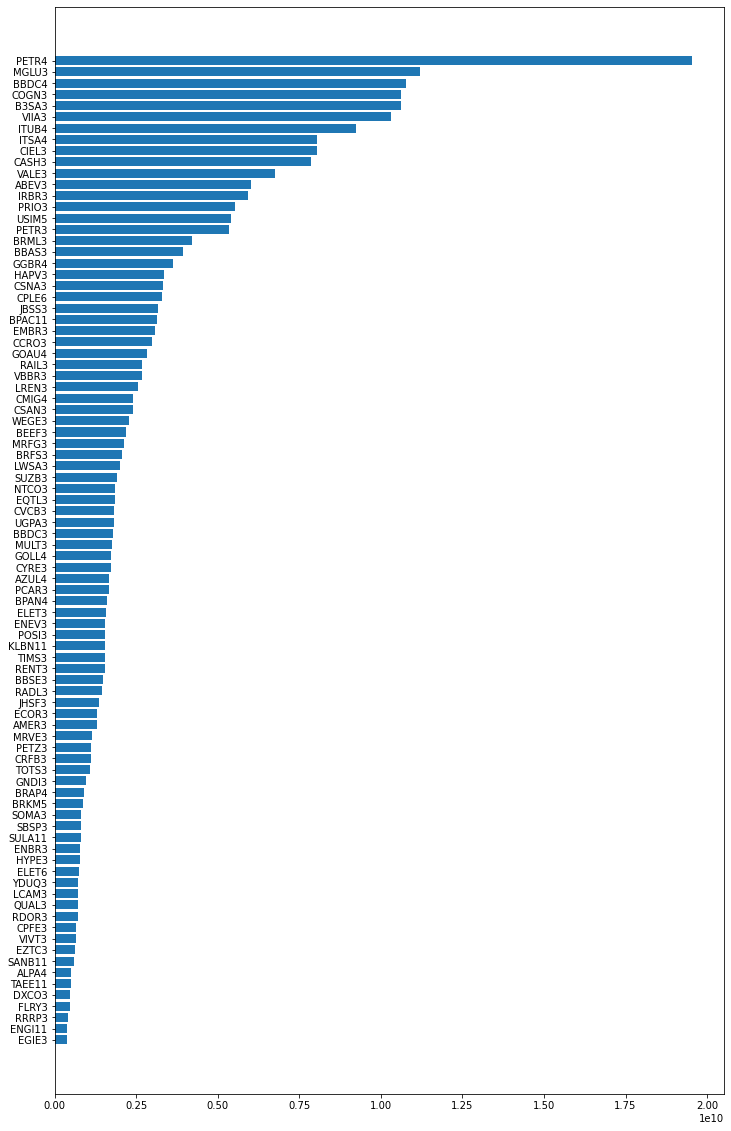

In [ ]:
# Transformando em dataframe para visualização

volumes = IBOV_shares_ohlc.groupby(['Ativo']).sum().sort_values(by = 'Volume')

import matplotlib.pyplot as plt

y = volumes.Volume

x = volumes.index

# Initialize a Figure and an Axes
fig, ax = plt.subplots()

# Fig size
fig.set_size_inches(12,20)

# Create horizontal bars
ax.barh(y=volumes.index, width=volumes.Volume);

## 3.7. Join (ou merge)

Operação realizada para unir dois dataframes diferentes.

Estes dataframes podem ou não conter dados para os mesmos indivíduos, observações  ou datas, por isso é necessário especificar qual tipo de join vamos aplicar.


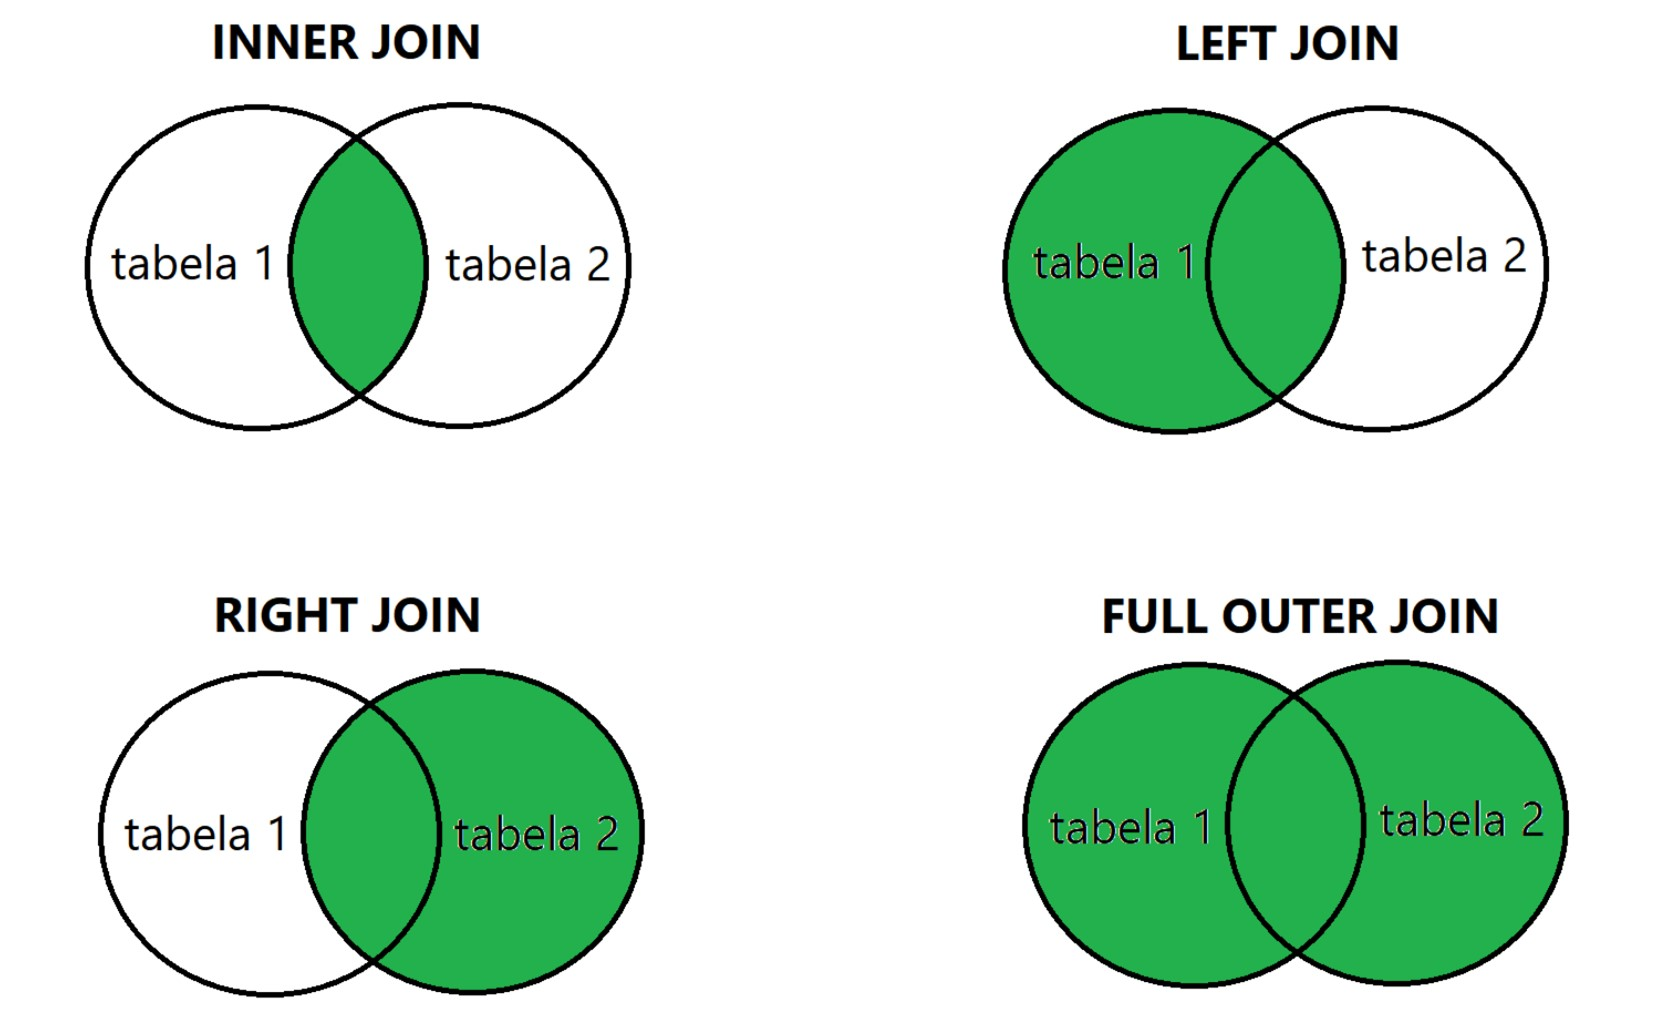

In [4]:
from IPython.display import Image

Image(filename = 'tipos_de_join.jpg', width=700, height=450)

### 3.7.1. Abrindo uma nova tabela

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
ibov = pd.read_csv('Bovespa.csv')

In [ ]:
ibov.head()

,Date,ABCB4,BBAS3,BBDC4,BPAN4,BTOW3,CGAS3,CMIG4,CSNA3,CYRE3,...,POMO4,QGEP3,RAPT4,SAPR4,SBSP3,SUZB5,TUPY3,USIM5,VALE5,WEGE3
0,6/5/2012,5.778904,13.193346,14.825962,NaN,4.67417,21.089613,16.403233,9.799454,13.011072,...,3.559332,7.938090,6.136378,4.945431,19.482090,4.228104,18.623053,7.724799,28.628716,6.314218
1,6/6/2012,5.784656,13.474055,15.421063,NaN,4.95184,21.367132,17.082111,9.838496,13.979592,...,3.727821,8.013066,6.316431,4.918369,19.842842,4.291890,18.852964,7.456715,29.472841,6.454251
2,6/8/2012,5.836405,13.488092,15.457347,NaN,5.08142,22.088638,17.082111,9.799454,14.025277,...,3.694127,7.825626,6.338035,5.256635,19.926100,4.437686,18.535686,7.635437,29.727674,6.368317
3,6/11/2012,5.922663,13.614412,15.628112,NaN,5.09993,22.088638,17.120369,9.705755,13.723758,...,3.753094,7.413257,6.482082,5.195747,20.203676,4.237216,17.629826,7.883664,29.377279,6.368317
4,6/12/2012,5.876658,13.614412,15.886813,NaN,5.34984,22.088638,17.689350,9.736986,13.632388,...,3.799433,7.413257,6.482082,5.202512,20.739265,4.146093,17.933311,7.754586,30.038250,6.365140


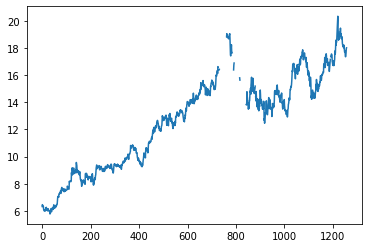

In [ ]:
ibov.WEGE3.plot()

Vamos extrair dados de outras fontes

In [ ]:
lren = yf.download('LREN3.SA', start = '2017-01-01', end = '2021-07-20')

[*********************100%***********************]  1 of 1 completed


In [ ]:
lren.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484770,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021254,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862577,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696342,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492325,2139141


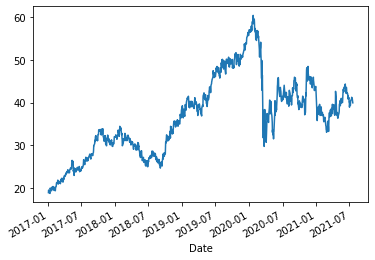

In [ ]:
lren.Close.plot()

Modificar os nomes das colunas de adjusted close

In [ ]:
lren.rename(columns = {'Adj Close': 'LREN3'}, inplace = True)

In [ ]:
lren.head()

,Open,High,Low,Close,LREN3,Volume
Date,,,,,,
2017-01-02,18.775900,19.013674,18.702108,18.972677,17.484770,676417
2017-01-03,19.103865,19.677799,18.808697,19.554813,18.021254,2976064
2017-01-04,19.636805,19.833582,19.177654,19.382631,17.862577,2671030
2017-01-05,19.464622,19.587610,19.161257,19.202253,17.696342,3587596
2017-01-06,19.202253,19.202253,18.808697,18.980877,17.492325,2139141


Filtrando coluna específica no data frame de IBOV

In [ ]:
acao = 'BBAS3'
ibov.index = pd.to_datetime(ibov.Date)
BBAS = ibov[acao]

In [ ]:
BBAS.head()

Date
2012-06-05    13.193346
2012-06-06    13.474055
2012-06-08    13.488092
2012-06-11    13.614412
2012-06-12    13.614412
Name: BBAS3, dtype: float64

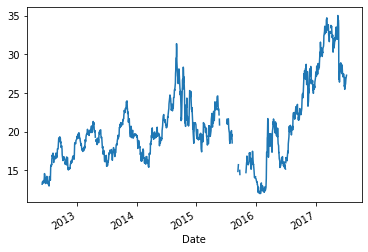

In [ ]:
BBAS.plot()

In [ ]:
novo = pd.merge(BBAS, lren, how = 'inner', on = 'Date')

In [ ]:
novo.head()

,BBAS3,Open,High,Low,Close,LREN3,Volume
Date,,,,,,,
2017-01-02,27.193352,18.775900,19.013674,18.702108,18.972677,17.484770,676417
2017-01-03,28.437492,19.103865,19.677799,18.808697,19.554813,18.021254,2976064
2017-01-04,28.289377,19.636805,19.833582,19.177654,19.382631,17.862577,2671030
2017-01-05,28.220261,19.464622,19.587610,19.161257,19.202253,17.696342,3587596
2017-01-06,28.526356,19.202253,19.202253,18.808697,18.980877,17.492325,2139141


In [ ]:
cotacoes = novo[['BBAS3','LREN3']]

In [ ]:
cotacoes.head()

,BBAS3,LREN3
Date,,
2017-01-02,27.193352,17.484770
2017-01-03,28.437492,18.021254
2017-01-04,28.289377,17.862577
2017-01-05,28.220261,17.696342
2017-01-06,28.526356,17.492325


In [ ]:
cotacoes.head()

,BBAS3,LREN3
Date,,
2017-01-02,27.193352,17.484770
2017-01-03,28.437492,18.021254
2017-01-04,28.289377,17.862577
2017-01-05,28.220261,17.696342
2017-01-06,28.526356,17.492325


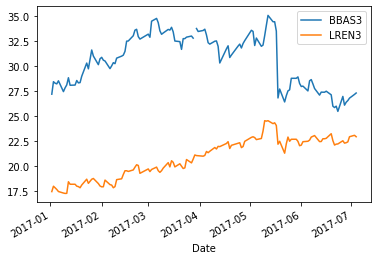

In [ ]:
cotacoes.plot();

In [ ]:
petro = IBOV_shares_ohlc[IBOV_shares_ohlc['Ativo']=='PETR4']
petro.rename(columns={'Adj Close':'PETR4'}, inplace = True)
petro.head()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Ano,Mes,Dia_semana,Ativo,Open,High,Low,Close,PETR4,Volume
Date,,,,,,,,,,
2021-01-04,2021,January,Monday,PETR4,28.650000,29.18,28.530001,28.910000,23.497816,74719700.0
2021-01-05,2021,January,Tuesday,PETR4,28.900000,30.18,28.240000,30.040001,24.416275,95181100.0
2021-01-06,2021,January,Wednesday,PETR4,30.160000,30.90,30.049999,30.100000,24.465040,96562500.0
2021-01-07,2021,January,Thursday,PETR4,30.340000,31.15,30.340000,31.000000,25.196552,56171300.0
2021-01-08,2021,January,Friday,PETR4,31.459999,31.76,30.350000,31.120001,25.294088,67136300.0


In [ ]:
petro.columns

Index(['Ano', 'Mes', 'Dia_semana', 'Ativo', 'Open', 'High', 'Low', 'Close',
       'PETR4', 'Volume'],
      dtype='object')

In [ ]:
final = pd.merge(novo, petro, how = 'inner', on = 'Date')

In [ ]:
final.shape

(0, 17)

Por que o join não retornou nenhuma linha? Porque não há interseção dos dados!

In [ ]:
final = pd.merge(novo, petro, how = 'outer', on = 'Date')

In [ ]:
final.shape

(373, 17)

In [ ]:
final.head()

,BBAS3,Open_x,High_x,Low_x,Close_x,LREN3,Volume_x,Ano,Mes,Dia_semana,Ativo,Open_y,High_y,Low_y,Close_y,PETR4,Volume_y
Date,,,,,,,,,,,,,,,,,
2017-01-02,27.193352,18.775900,19.013674,18.702108,18.972677,17.484770,676417.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-03,28.437492,19.103865,19.677799,18.808697,19.554813,18.021254,2976064.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,28.289377,19.636805,19.833582,19.177654,19.382631,17.862577,2671030.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-05,28.220261,19.464622,19.587610,19.161257,19.202253,17.696342,3587596.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-06,28.526356,19.202253,19.202253,18.808697,18.980877,17.492325,2139141.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


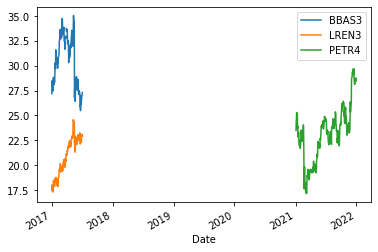

In [ ]:
final[['BBAS3','LREN3','PETR4']].plot()

### Perceba então o resultado: temos dados para períodos diferentes em cada um dos papéis!

É exatamente por isso que o gráfico resultante acima ficou com um "vazio".

Com isso, finalizamos o noss módulo de Manipulação de Dados!